In [1]:
import numpy as np

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


In [4]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [5]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.5]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2

(3,)
(3, 2)
(2,)


In [6]:
def identity_function(x):
    return x

In [7]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(A2, W3) + B3
Y = identity_function(A3)

In [8]:
class Net:
    
    def __init__(self):
        self.w1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
        self.b1 = np.array([0.1, 0.2, 0.3])
        self.w2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
        self.b2 = np.array([0.1, 0.2])
        self.w3 = np.array([[0.1, 0.3], [0.2, 0.4]])
        self.b3 = np.array([0.1, 0.2])
        
    def forward(self, x):
        a1 = np.dot(x, self.w1) + self.b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, self.w2) + self.b2
        z2 = sigmoid(a2)
        a3 = np.dot(z2, self.w3) + self.b3
        y = identity_function(a3)
        
        return y        

In [9]:
net = Net()
x = np.array([1.0, 0.5])
y = net.forward(x)
print(y)

[0.31682708 0.69627909]


Softmax function

$y_k = {\exp(a_k) \over \sum_{i=1}^{n}\exp(a_i)}$

In [10]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [11]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y 

In [12]:
a = np.array([1010, 1000, 990])
# np.exp(a) / np.sum(np.exp(a)) # overflow

c = np.max(a)
a - c
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [13]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [14]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


In [15]:
import sys, os

sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, y_train), (x_test, y_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [16]:
img = x_train[0]
label = y_train[0]
print(label)
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

5
(784,)
(28, 28)


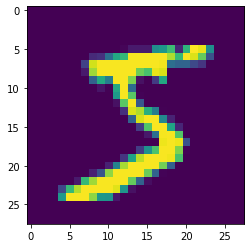

In [17]:
import matplotlib.pyplot as plt

plt.imshow(img)

In [18]:
def get_data():
    (x_train, y_train), (x_test, y_test) = load_mnist(normalize=True, flatten=True, 
                                                      one_hot_label=False)
    
    return x_test, y_test

In [19]:
import pickle

class Net:
    def __init__(self):
        self.network = self.init_network()
        
    def init_network(self):
        with open("../dataset/sample_weight.pkl", "rb") as f:
            network = pickle.load(f)
            
        return network

    def predict(self, x):
        network = self.network
        w1, w2, w3 = network["W1"], network["W2"], network["W3"]
        b1, b2, b3 = network["b1"], network["b2"], network["b3"]
        a1 = np.dot(x, w1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, w2) + b2
        z2 = sigmoid(a2)
        a3 = np.dot(z2, w3) + b3
        y = softmax(a3)
        
        return y

In [20]:
x_test, y_test = get_data()
net = Net()

accuracy_cnt = 0
for i, x in enumerate(x_test):
    pred = np.argmax(net.predict(x))
    if pred == y_test[i]:
        accuracy_cnt += 1

print(f"Accuracy: {str(float(accuracy_cnt) / len(x_test))}")

Accuracy: 0.9352


In [21]:
network = net.init_network()
w1, w2, w3 = network["W1"], network["W2"], network["W3"]
b1, b2, b3 = network["b1"], network["b2"], network["b3"]

print(x_test.shape)
print(x_test[0].shape)
print(w1.shape)
print(w2.shape)
print(w3.shape)
print(b1.shape)
print(b2.shape)
print(b3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)
(50,)
(100,)
(10,)


In [22]:
batch_size = 100
x_test, y_test = get_data()
net = Net()

accuracy_cnt = 0
for i in range(0, len(x_test), batch_size):
    x_batch = x_test[i:i + batch_size]
    y_batch = net.predict(x_batch)
    pred = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(pred == y_test[i:i + batch_size])

print(f"Accuracy: {str(float(accuracy_cnt) / len(x_test))}")

Accuracy: 0.9352
